# Apresentação Regressão

**Fabio Cavaleti**

**Gabriela Barros**

## Introdução

### Regressão e classificação

Regressão e classificação são tarefas de aprendizado supervisionado. A **regressão** é uma tarefa que tenta predizer um valor numérico e contínuo enquanto que a **classificação** tenta classificar o dado em uma classe que pertence a um conjunto discreto de classes.


## Regressão Linear

**Regressão linear** é uma técnica estatística simples de regressão que tenta encontrar uma relação linear entre as variáveis explicativas e a variável resposta.

A equação a seguir descreve de maneira generalizada uma regressão linear:

$$
y = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + ... + \beta_n * x_n + \varepsilon
$$

- $y$ é a variável resposta, ou seja, é a variável que o nosso modelo tenta prever e obter um valor.
- $x$ são nossas variáveis explicativas que são as entradas do nosso modelo
- Os valores de $\beta$ são os coeficientes, os quais são os parâmetros que nosso modelo procurar calcular para obter o melhor modelo possível
- $\beta_0$ é chamado de bias e é um coeficiente que não é acompanhado de nenhuma variável explicativa. Ou melhor, podemos considerar que há uma variável $x_0 = 1$
- Os coeficientes, junto com as variáveis explicativas, são chamados de **componente sistemático** do nosso modelo. Isso porque eles não são aleatórios e não variam uma vez que seus valores são determinados
- $\varepsilon$ é o erro do nosso modelo. Nosso modelo gera um valor predito ,$\hat{y}$, que tem uma diferença do valor real da variável resposta $y$. Afinal, estamos fazendo uma aproximação e isso significa que nem sempre nosso modelo irá acertar 100% o valor correto. Podemos chamar $\varepsilon$ de **componente aleatório** do nosso modelo, pois, em termos estatísticos, ele se trata de uma variável aleatória
- Como toda variável aleatória, $\varepsilon$ segue alguma distribuição de probabilidade. **A regressão linear assume que o erro segue uma distribuição Normal.**

Uma outra forma de representar a regressão linear é pela seguinte relação:
$$
h_{\theta}(x) = \theta^Tx
$$

Essa é uma representação vetorial em que $\theta$ é o vetor dos coeficientes e $x$ é o vetor das variáveis explicativas.

![Gráfico Regressao Linear](regressaoLin.png)

### Função de custo

Agora que sabemos como é a função da regressão linear, como podemos encontrar os melhores valores para os coeficientes?

- Pensando de maneira lógica, se nós buscarmos uma maneira de minimizar o valor do erro, então a precisão de nossas predições será maximada.
- Dessa maneira, precisamos montar uma função que nos diz o quanto nós estamos errando. Esse tipo de função é chamado de função de custo $J$.
- Na regressão linear a maneira mais utilizada de se calcular o erro aleatório é utilizando a métrica MSE que calcula a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados.
- Dessa forma, baseada na métrica MSE, temos a seguinte função de custo $J(\theta)$:

$$
J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)} )^2
$$

- Observe, porém que nossa função $J(\theta)$ divide a fórmula do MSE por 2. Isso é opcional e pode nos ajudar nos próximos passamos como veremos adiante.

- Agora que temos uma função de custo, minimizar essa função significa minimizar o erro e consequentemente otimizar nosso modelo.
- Uma maneira natural de realizarmos essa minimização é calcularmos a derivada parcial para cada valor de $\theta_i$ e igualarmos todas as equações a zero e assim encontrarmos os melhores valores de cada $\theta$.
- Esse método, entretanto, é muito custoso e tem uma complexidade de $O(N^3)$.

### Gradiente Descendente

Uma maneira mais otimizada de minimizar a função de custo e obter os valores dos coeficientes é utilizando a técnica do gradiente descendente. Mas o que é isso?

#### O que é Gradiente ($\nabla f$)

- A função gradiente é um conceito fundamental em cálculo vetorial e análise matemática.
- Sem entrar em muitos detalhes matemáticos, gradiente é uma função matemática que indica a direção em que a função original cresce mais rapidamente. Ou seja ele indica o caminho em que se deve percorrer se quer maximizar uma função
- No nosso caso, estamos interessado no negativo do gradiente ($-\nabla f$), que nos indica a direção em que a função decresce mais rapidamente. Com isso podemos resolver problemas de minimização.

![Gradiente Negativo](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IxMLWG1xsZ50b91M5VJXSA.jpeg)

#### Gradiente Descendente

- O gradiente descendete é um **método iterativo** que utiliza o gradiente para minimizar uma função. Em cada interação, o gradiente descendente "caminha" uma certa quantidade na direção em que a função decresce mais rapidamente
- Basicamente, utilizamos o valor da última iteração do algoritmo e o gradiente da função para dar um novo passo na iteração atual

$$
\theta_i = \theta_i + \alpha * \frac{\partial}{\partial\theta_i}J(\theta_i)
$$

- O passo é definido pelo hiperparâmetro chamado de taxa de aprendizado ($\alpha$). Esse hiperparâmetro é muito importante pois ele define o quanto vamos caminhar a cada interação. Se a taxa de aprendizado for muito pequena, então nosso algorítmo terá muitas iterações, várias desnecessárias, e teremos um custo computacional muito grande. Se a taxa de aprendizado for muito grande, então corremos o risco de na última iteração ultrapassarmos o ponto de mínimo da função, fazendo com que o algoritmo não consiga convergir.


![taxa de aprendizado](https://miro.medium.com/v2/resize:fit:720/format:webp/1*vuMse7jQQXTcWZdQ9gRGCw.png)

- O que se faz na prática é ir alterando o valor do learning rate conforme as iterações vão ocorrendo. Dessa forma, começamos com passos grandes e o tamanho dos passos vão diminuindo a cada iteração até chegarmos em um ponto de parada.

![taxa de aprendizado](https://miro.medium.com/v2/resize:fit:720/format:webp/1*KTBDxTcAHwAF2Y2ndICY2w.png)

- Falando um pouco sobre como calcular o gradiente... Para a métrica MSE temos que:
$$
    \frac{\partial MSE}{\partial\theta_i} = \frac{2}{m}\sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)} )x_i
$$

- É aqui que a divisão por 2 da nossa função $J(\theta)$ nos ajuda. Ele cancela a multiplicação por 2 e obtemos:

$$
    \frac{\partial J(\theta)}{\partial\theta_i} = \frac{1}{m}\sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)} )x_i
$$

#### Gradiente descendente funcionando visualmente

![gradiente exemplo](https://miro.medium.com/v2/resize:fit:720/format:webp/1*wsBakfF2Geh1zgY4HJbwFQ.gif)

#### Observações finais

- A técnica do gradiente descendente caminha na direção em que a função decresce mais rapidamente. Entretanto, o gradiente descendente pode estar caminhando para um ponto de mínimo local. Ou seja, ele não garante que vamos chegar até o ponto de mínimo global. Tudo depende da função e da inicialização aleatória da primeira iteração.

### Interpretabilidade

- A regressão linear é um modelo de fácil interpretabilidade. Após o treinamento do modelo podemos observar o valor dos coeficientes para verificarmos quais variáveis possuem maior impacto no cálculo da saída.

### Linearidade

#### Como verificar linearidade?

- Há duas formas muito comuns de testar a linearidade dos dados:
- A primeira, e a mais simples, é basicamente fazer um plot com a variável resposta e cada uma das variáveis explicativas e verificar se há uma relação linear entre elas.
- A segunda maneira, e a mais utilizada, é após o treinamento do modelo, observar graficamente a dispersão dos resíduos com os valores preditos pelo modelo.
- Um resíduo é a diferença entre o valor real $y$ e o valor predito $\hat{y}$
- O gráfico residual vs fitted é um gráfico em que no eixo $x$ temos os valores preditos pelo nosso modelo e no eixo y temos os resíduos das predições
- Uma relação linear  entre os dados indica que não deve haver relação entre os resíduos e as predições. Dessa forma, teremos linearidade se nesse gráfico os pontos estiverem uniformemente distribuídos sobre uma linha horizontal

![Análise de resíduo](https://i.stack.imgur.com/rtn7e.png)

#### Linearização
- Mas e caso não encontremos uma relação linear entre as variáveis?
- Muitas relações são possíveis de serem linearizadas através de um transformação que pode acontecer tanto em $y$ quanto em $x$
- Ao aplicar transformações em $y$ depois podemos apenas desfazer a transformação para obter o resultado original
- Aplicar transformações em $x$ implica em adicionar novas features em nosso modelo com essas novas transformações e isso deve ser feito com cuidado pois acabar levando o nosso modelo ao overfitting, principalmente com features polinomiais
- Alguns exemplos: $log(y)$, $x_2 = x_1^2$, $x_3 = x_1*x_2$

### Vantagens da Regressão Linear
- É um modelo simples e eficiente
- Possui fácil interpretabilidade
- Muitas coisas possuem relações lineares, e muitas outras relações podem ser linearizadas
- Entender os fundamentos da regressão linear ajuda no entendimento de outros algortimos poderosos e complexos como o SVM e Redes Neurais.



## Prática de regressão linear

In [92]:
# Instalando bibliotecas

# !pip install ISLP
# !pip install seaborn

In [93]:
#Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ISLP import load_data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

In [94]:
#Informações sobre o dataset em: https://islp.readthedocs.io/en/latest/datasets/Boston.html
df = load_data('Boston')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [95]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [96]:
df.shape

(506, 13)

In [97]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


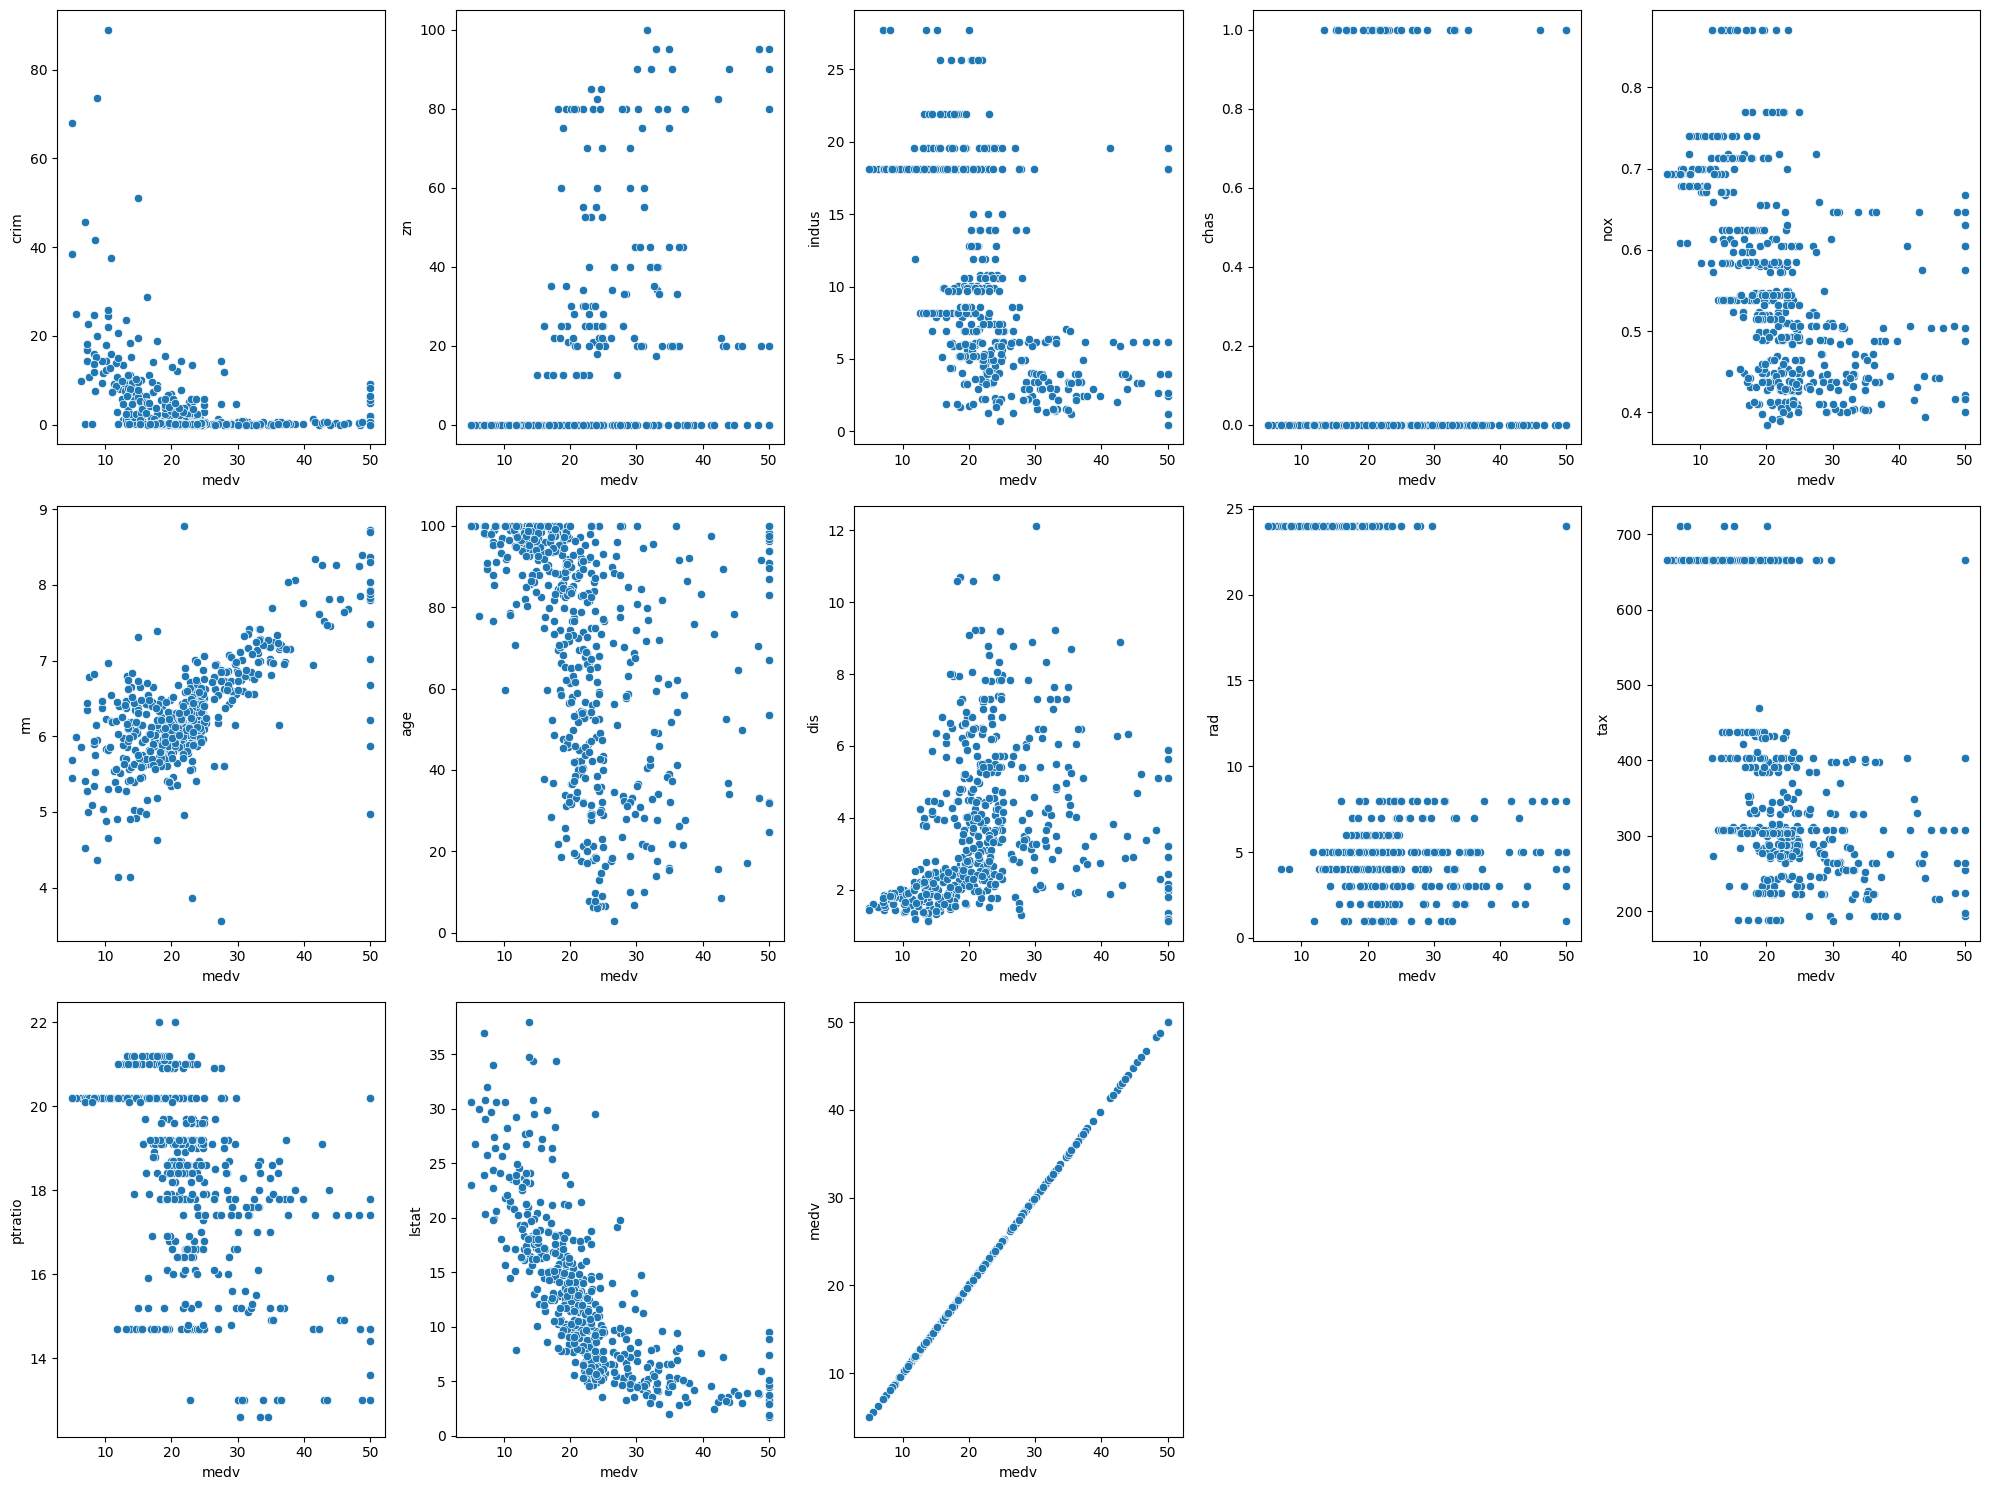

In [98]:
# Plotting `Price` with remaining columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['medv'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [99]:
target = ['medv']
# features =  [x for x in df.columns if x not in target]
features = ['lstat', 'rm']
y = df[target]
X = df[features]

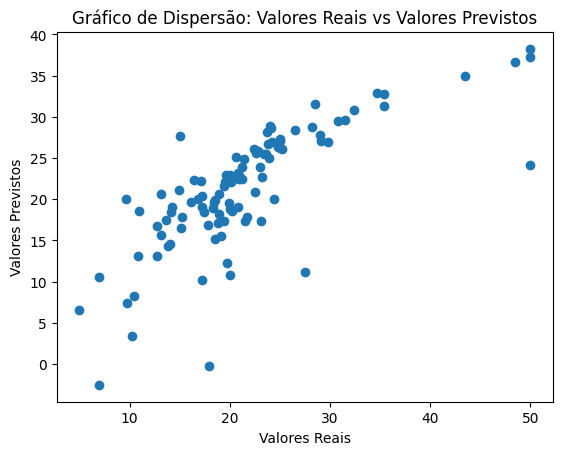

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Gráfico de Dispersão: Valores Reais vs Valores Previstos")
plt.show()

In [101]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.898759721382358
MSE: 31.243290601783627
RMSE: 5.589569804715174


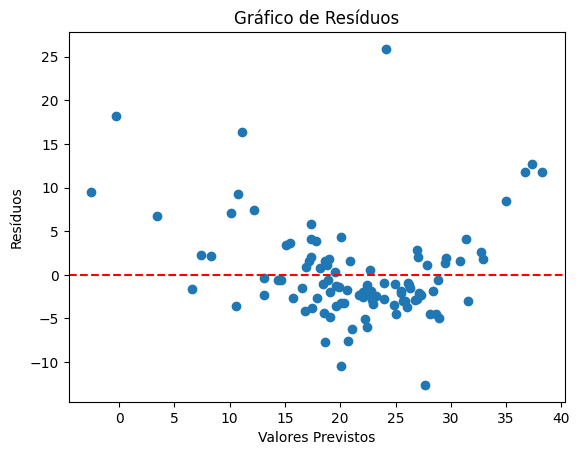

In [102]:
residuos = y_test - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Resíduos")
plt.show()

In [103]:
# Transformar os coeficientes em uma lista unidimensional
coeficientes_unidimensional = model.coef_.flatten()

# Criar o DataFrame com os coeficientes unidimensionais
coeficientes = pd.DataFrame(coeficientes_unidimensional, columns=['Coefficients'], index=X.columns)
coeficientes

,Coefficients
lstat,-0.632499
rm,5.465099


In [104]:
model.intercept_

array([-3.84117708])

In [105]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [106]:
df['medv_log'] = np.log(df['medv'])
df.drop('medv', axis = 1,inplace=True)

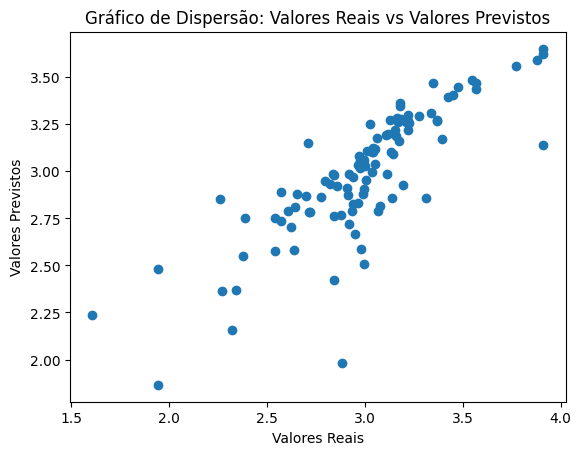

In [111]:
target = ['medv_log']
# features =  [x for x in df.columns if x not in target]
features = ['lstat', 'rm']

y = df[target]
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Gráfico de Dispersão: Valores Reais vs Valores Previstos")
plt.show()

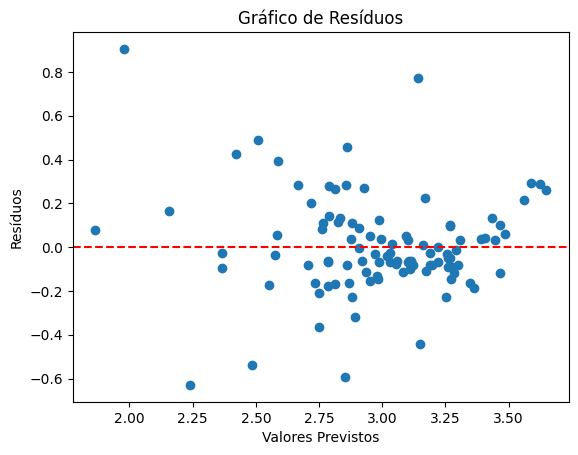

In [112]:
residuos = y_test - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Resíduos")
plt.show()

In [113]:
results = y_test
results['y_pred'] = y_pred
results

,medv_log,y_pred
173,3.161247,3.188354
274,3.478158,3.444702
491,2.610070,2.786197
72,3.126761,3.271902
452,2.778819,2.860652
...,...,...
412,2.884801,1.979498
436,2.261763,2.854283
411,2.844909,2.762125
86,3.113515,2.987545


In [114]:
# Transformar os coeficientes em uma lista unidimensional
coeficientes_unidimensional = model.coef_.flatten()

# Criar o DataFrame com os coeficientes unidimensionais
coeficientes = pd.DataFrame(coeficientes_unidimensional, columns=['Coefficients'], index=X.columns)
coeficientes

,Coefficients
lstat,-0.037781
rm,0.140859


## Regressão Logística

A Regressão Logística é um método estatístico que modela a probabilidade de determinado evento pertencer ou não a uma classe a partir de um conjunto de variáveis independentes. Assim, a Regressão Logística, diferente da Regressão Linear, é um algoritmo de **classificação binária**. A principal vantagem da regressão logística é a interpretabilidade.
![Logistic Regression: Maximum Likelihood Estimation & Gradient Descent](https://miro.medium.com/v2/resize:fit:828/format:webp/1*CnuRMdePkWf59B5Y_Mf9Fg.png)

### Suposições do modelo
- A variável resposta **Y** deve ser **binária**, i.e., $y_i \in {0,1}$, spam ou não spam, fraude ou não fraude;
- Ausência de multicolineariedade: as variáveis preditoras **X**$ = (x_1,x_2,...,x_n)$ devem ser independentes entre si;
- A relação entre as variáveis preditoras e a função preditora sigmóide é linear.
#### Comparação com a regressão linear:
Diferente da regressão linear, a regressão logística **não** presspõe:
- homocedasticidade(variância constante); 
- normalidade dos resíduos;
- relação linear entre variáveis preditoras e variável predita.
### A função Sigmóide 
#### A função logística ou sigmóde
A função logística é definida por:
$$f(z) = \frac{1} {1 + e^{-z}}, z \in \mathbb{R}.$$
 
#### A função Sigmóide para Regressão Logística 
$$P(y = 1| \mathbf(X)) = \sigma(z) = \frac{1} {1 + e^{-z}}$$, em que $$ z =  \hat{\beta_{0}} + \hat{\beta_1}x_1 + \hat{\beta_2} x_2 + ... + \hat{\beta_n}x_n$$.

$\beta_{0},\beta_{1},...,\beta_{2}$, assim como em regressão linear, são os parâmetros, coeficiêntes ou pesos.
ou 
A função sigmoide retorna um valor entre 0 e 1. Por isso, o valor retornado pode ser interpretado como a probabilidade da observação $i$ pertencer à classe de interesse(neste caso, a classe de interesse é $y=1$).

#### O que o algorítmo da função logística nos retorna?

##### Chance
A chance ($\textit{odds}$) de um evento ocorrer é definica como a probabilidade (p) do evento ocorrer divida pelo probabilidade de o evento não ocorrer (1-p):
$$odds = \frac{p}{(1-p)}.$$

Quando aplicamos a função logarítmica em ambos os lados da equação, temos o log da chance ou $\textit{log odds}$:
$$log odds = \log{\frac{p}{(1-p)}}.$$


![REGRESSÃO LOGÍSTICA – ALGORITMOS DE APRENDIZADO DE MÁQUINAS](https://www.hashtagtreinamentos.com/wp-content/uploads/2022/12/REGRESSAO-LOGISTICA-5.png)

#### Função de custo (ou estimando os parâmetros)
##### Método de Máxima Verossimilhança
O Método de Máxima Verossimilhança é um método estatístico para a estimação de parâmetros de um modelo estatístico.
$$\max_{\theta} \prod_y p(y;\theta)$$
###### Log Verossimilhança e Log Verossimilhança Negativa
Maximizar a Máxima Verossimilhança equivale a maximizar o logarítmo da função de Máxima Verossimilhança, já que a função logarítmica é uma função monótona (ou seja, ela preserva a relação de ordem). Consequentemente, se multiplicarmos a verossimilhança por -1, obtemos a Log Verossimilhança Negativa e encontrar seu ponto de mínimo equivale a encontrar o ponto de máximo da verossimilhança.
$$NLL(y) = -{\log(p(y))}$$

$$\min_{\theta} \sum_y {-\log(p(y;\theta))}$$

A Log Verossimilhança Negativa também é chamada de $\textit{cross-entropy}$.

##### Log Loss
 Assim, a função de custo para regressão logística é chamada de $\textit{cross-entropy} ou \texit{LogLoss}$ e é definida da forma:
$$J(\theta) = -(y \log{h_{\theta}(x)} + (1 - y) \log {(1-h_{\theta}(x)))}$$ em que $h_{\theta}(x) = \frac{1} {1 + e^{-z}}$ com $ z =  \hat{\beta_{0}} + \hat{\beta_1}x_1 + \hat{\beta_2} x_2 + ... + \hat{\beta_n}x_n = \theta^Tx$ é nossa função preditora. 
Os métodos de minimizar essa função é semelhante aos utilizados para minimizar os mínimos quadrados em regressão linear- pode ser usado o algoritmo de minimização de gradiente descendente, por exemplo.

### Regressão Logística Multiclasse
O modelo da Regressão Logística pode ser extendido para classificações de uma variável resposta em mais de duas categorias, isto é, para **classificação multiclasse**. Podemos usar a técnica de One-vs-All ou a Regressão Logística Multinomial:
#### One-vs-All (ou One-vs-Rest)
![Logistic Regression: Maximum Likelihood Estimation & Gradient Descent](https://miro.medium.com/v2/resize:fit:828/format:webp/1*LHXXyxJR8tmXC-oDUrsSWg.png)
#### Regressão Logística Multinomial 
![Plot multinomial and One-vs-Rest Logistic Regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_multinomial_001.png)
##### Função Softmax
$$\sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K$$



## Referências
- [Aula Data Joao Guilherme](https://www.youtube.com/watch?v=4eYwvvPyDeQ&t=328s&ab_channel=DataICMC)
- [Aula Data Luisa](https://www.youtube.com/watch?v=UfMi1w6VtJg&t=3144s&ab_channel=DataICMC)
- [Wikipedia Regressão Linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear)
- [Medium Gradiente Descendent](https://medium.com/data-hackers/gradientes-descendentes-na-pr%C3%A1tica-melhor-jeito-de-entender-740ef4ff6c43)
- [Regressão Linear com gradiente descendente](https://medium.com/@bruno.dorneles/regress%C3%A3o-linear-com-gradiente-descendente-d3420b0b0ff)
- [Interpretando gráfico de resíduos](https://stats.stackexchange.com/questions/76226/interpreting-the-residuals-vs-fitted-values-plot-for-verifying-the-assumptions)
- [Um pouco mais sobre as funções de custo](https://www.youtube.com/watch?v=bNwI3IUOKyg&list=WL&index=4&ab_channel=DataMListic)
- [Logistic Regression: Maximum Likelihood Estimation & Gradient Descent](https://miro.medium.com/v2/resize:fit:828/format:webp/1*LHXXyxJR8tmXC-oDUrsSWg.png)
- [REGRESSÃO LOGÍSTICA – ALGORITMOS DE APRENDIZADO DE MÁQUINAS](https://www.hashtagtreinamentos.com/wp-content/uploads/2022/12/REGRESSAO-LOGISTICA-5.png)
- [Plot multinomial and One-vs-Rest Logistic Regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_multinomial_001.png)